In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def upper_outliers(ser, cut):
    q1, q3 = ser.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + cut * iqr
    return ser.apply(lambda x: max([x - upper_bound, 0]))

In [13]:
def add_upper_outlier_cols(df, cut):
    for col in df.select_dtypes('number'):
        df[col + '_upper_outliers'] = upper_outliers(df[col], cut)
    return df

In [33]:
def lower_outliers(ser, cut):
    q1, q3 = ser.quantile([.25, .75])
    iqr = q3 - q1
    lower_bound = q1 - cut * iqr
    return ser.apply(lambda x: max([lower_bound - x, 0]))

In [15]:
def add_lower_outlier_cols(df, cut):
    for col in df.select_dtypes('number'):
        df[col + '_lower_outliers'] = lower_outliers(df[col], cut)
    return df

### 1. Using lemonade.csv dataset and focusing on continuous variables:

### Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5.

In [27]:
df = pd.read_csv('lemonade.csv')
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [28]:
df.shape

(365, 7)

In [29]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [35]:
lowerdf = df.copy()
lowerdf = add_lower_outlier_cols(lowerdf, 1.5)
lowerdf.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_lower_outliers,Rainfall_lower_outliers,Flyers_lower_outliers,Price_lower_outliers,Sales_lower_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0,0.0,0.0,0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.0,0,0.0,0.0,0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.0,0,0.0,0.0,0
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,0.0,0,0.0,0.0,0
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,0.0,0,0.0,0.0,0


In [36]:
lowerdf[lowerdf.Temperature_lower_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_lower_outliers,Rainfall_lower_outliers,Flyers_lower_outliers,Price_lower_outliers,Sales_lower_outliers
364,12/31/17,Sunday,15.1,2.5,9,0.5,7,1.6,0,0.0,0.0,0


In [37]:
lowerdf[lowerdf.Rainfall_lower_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_lower_outliers,Rainfall_lower_outliers,Flyers_lower_outliers,Price_lower_outliers,Sales_lower_outliers


In [38]:
lowerdf[lowerdf.Flyers_lower_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_lower_outliers,Rainfall_lower_outliers,Flyers_lower_outliers,Price_lower_outliers,Sales_lower_outliers
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,0.0,0,42.0,0.0,0


In [39]:
lowerdf[lowerdf.Price_lower_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_lower_outliers,Rainfall_lower_outliers,Flyers_lower_outliers,Price_lower_outliers,Sales_lower_outliers


In [42]:
lowerdf[lowerdf.Sales_lower_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_lower_outliers,Rainfall_lower_outliers,Flyers_lower_outliers,Price_lower_outliers,Sales_lower_outliers


### Do these lower outliers make sense?

The outlier in temperature makes sense because it was during winter and it's not unbelievably cold.

Flyers having a negative value on the other hand makes no sense and should be removed.

### Which outliers should be kept?

Temperature outlier should be kept and the flyer outlier removed.

### Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. 

In [41]:
upperdf = df.copy()
upperdf = add_upper_outlier_cols(upperdf, 1.5)
upperdf.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Rainfall_upper_outliers,Flyers_upper_outliers,Price_upper_outliers,Sales_upper_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0.70,0.0,0.0,0.0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.0,0.03,0.0,0.0,0.0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.0,0.03,0.0,0.0,0.0
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,0.0,0.00,0.0,0.0,0.0
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,0.0,0.00,0.0,0.0,0.0


In [44]:
upperdf[upperdf.Temperature_upper_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Rainfall_upper_outliers,Flyers_upper_outliers,Price_upper_outliers,Sales_upper_outliers
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,107.3,0.0,0.0,0.0,0.0


In [45]:
upperdf[upperdf.Rainfall_upper_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Rainfall_upper_outliers,Flyers_upper_outliers,Price_upper_outliers,Sales_upper_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0.70,0.0,0.0,0.0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.0,0.03,0.0,0.0,0.0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.0,0.03,0.0,0.0,0.0
5,1/6/17,Friday,25.3,1.54,23,0.5,11,0.0,0.24,0.0,0.0,0.0
6,1/7/17,Saturday,32.9,1.54,19,0.5,13,0.0,0.24,0.0,0.0,0.0
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12,0.0,0.24,0.0,0.0,0.0
11,1/12/17,Thursday,38.2,1.33,16,0.5,14,0.0,0.03,0.0,0.0,0.0
12,1/13/17,Friday,37.5,1.33,19,0.5,15,0.0,0.03,0.0,0.0,0.0
15,1/16/17,Monday,30.6,1.67,24,0.5,12,0.0,0.37,0.0,0.0,0.0
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14,0.0,0.13,0.0,0.0,0.0


In [47]:
upperdf[upperdf.Flyers_upper_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Rainfall_upper_outliers,Flyers_upper_outliers,Price_upper_outliers,Sales_upper_outliers
166,6/16/17,Friday,99.3,0.47,77,0.5,41,0.0,0.0,1.0,0.0,0.0
194,7/14/17,Friday,92.0,0.50,80,0.5,40,0.0,0.0,4.0,0.0,0.0


In [49]:
upperdf[upperdf.Price_upper_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Rainfall_upper_outliers,Flyers_upper_outliers,Price_upper_outliers,Sales_upper_outliers


In [50]:
upperdf[upperdf.Sales_upper_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Rainfall_upper_outliers,Flyers_upper_outliers,Price_upper_outliers,Sales_upper_outliers
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,0.0,0.0,0.0,0.0,98.0
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,0.0,0.0,0.0,0.0,113.0
183,7/3/17,Monday,81.5,0.54,68,0.5,235,0.0,0.0,0.0,0.0,190.0
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,0.0,0.0,0.0,0.0,489.0


### Do these lower outliers make sense?

Temperature: Outlier is way too high, temperature is at water boiling point.  
Rainfall: None of the rain is unreasonably high.  
Flyers: They may have had help distributing flyers that day, the value is not unreasonably high.  
Price: No upper outliers.  
Sales: The dates of the outliers fall in the July 4th weekend. Higher than normal sales can be expected.

### Which outliers should be kept?

Any of them other than the temperature outlier, the rest make sense and should be kept.`

### Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. 

In [51]:
lower3_df = df.copy()
lower3_df = add_lower_outlier_cols(lower3_df, 3)
lower3_df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_lower_outliers,Rainfall_lower_outliers,Flyers_lower_outliers,Price_lower_outliers,Sales_lower_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0,0,0.0,0.0,0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0,0,0.0,0.0,0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0,0,0.0,0.0,0
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,0,0,0.0,0.0,0
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,0,0,0.0,0.0,0


In [52]:
lower3_df[lower3_df.Temperature_lower_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_lower_outliers,Rainfall_lower_outliers,Flyers_lower_outliers,Price_lower_outliers,Sales_lower_outliers


In [53]:
lower3_df[lower3_df.Rainfall_lower_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_lower_outliers,Rainfall_lower_outliers,Flyers_lower_outliers,Price_lower_outliers,Sales_lower_outliers


In [54]:
lower3_df[lower3_df.Flyers_lower_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_lower_outliers,Rainfall_lower_outliers,Flyers_lower_outliers,Price_lower_outliers,Sales_lower_outliers
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,0,0,15.0,0.0,0


In [55]:
lower3_df[lower3_df.Price_lower_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_lower_outliers,Rainfall_lower_outliers,Flyers_lower_outliers,Price_lower_outliers,Sales_lower_outliers


In [56]:
lower3_df[lower3_df.Sales_lower_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_lower_outliers,Rainfall_lower_outliers,Flyers_lower_outliers,Price_lower_outliers,Sales_lower_outliers


### Do these lower outliers make sense?

The only outlier is the flyers outlier which still makes no sense seeing as it has a negative value.

### Which outliers should be kept?

The one outlier should not be kept.

### Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. 

In [58]:
upper3_df = df.copy()
upper3_df = add_upper_outlier_cols(upper3_df, 3)
upper3_df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Rainfall_upper_outliers,Flyers_upper_outliers,Price_upper_outliers,Sales_upper_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0.31,0,0.0,0.0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.0,0.00,0,0.0,0.0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.0,0.00,0,0.0,0.0
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,0.0,0.00,0,0.0,0.0
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,0.0,0.00,0,0.0,0.0


In [59]:
upper3_df[upper3_df.Temperature_upper_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Rainfall_upper_outliers,Flyers_upper_outliers,Price_upper_outliers,Sales_upper_outliers
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,74.3,0.0,0,0.0,0.0


In [60]:
upper3_df[upper3_df.Rainfall_upper_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Rainfall_upper_outliers,Flyers_upper_outliers,Price_upper_outliers,Sales_upper_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0.31,0,0.0,0.0
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,0.0,0.13,0,0.0,0.0
343,12/10/17,Sunday,31.3,1.82,15,0.5,11,0.0,0.13,0,0.0,0.0
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,0.0,0.81,0,0.0,0.0


In [61]:
upper3_df[upper3_df.Flyers_upper_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Rainfall_upper_outliers,Flyers_upper_outliers,Price_upper_outliers,Sales_upper_outliers


In [62]:
upper3_df[upper3_df.Price_upper_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Rainfall_upper_outliers,Flyers_upper_outliers,Price_upper_outliers,Sales_upper_outliers


In [63]:
upper3_df[upper3_df.Sales_upper_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Rainfall_upper_outliers,Flyers_upper_outliers,Price_upper_outliers,Sales_upper_outliers
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,0.0,0.0,0,0.0,83.0
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,0.0,0.0,0,0.0,98.0
183,7/3/17,Monday,81.5,0.54,68,0.5,235,0.0,0.0,0,0.0,175.0
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,0.0,0.0,0,0.0,474.0


### Do these upper outliers make sense? 

Temperature: A temperature of 212 does not make sense, this is the boiling point.  
Rainfall: These just seem to be particularly rainy days. Nothing insane.  
Flyers: No outliers.  
Price: No outliers.
Sales: These sales fall on July 4th weekend, increased sales can be expected.

### Which outliers should be kept?

All of the outliers except for the temperature outlier should be kept.

### 2. Identify if any columns in lemonade.csv are normally distributed.

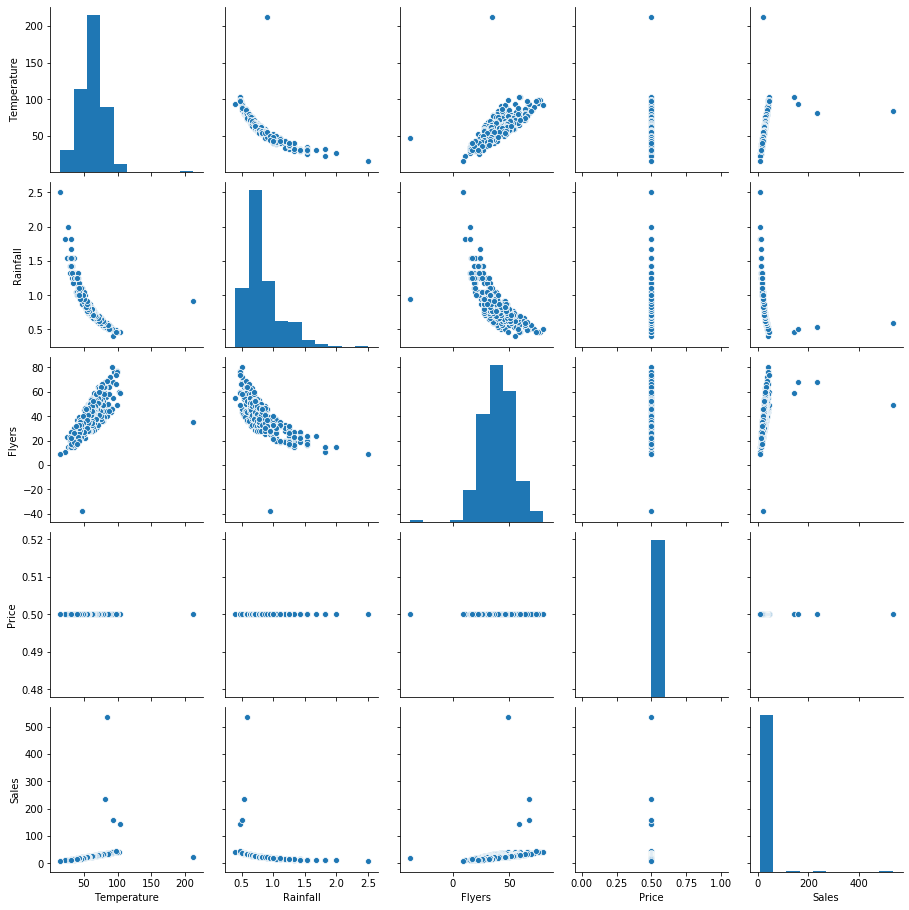

In [73]:
sns.pairplot(df)

The only normally distributed data is Temperature and Flyers

### For normally distributed columns:

* Use a 2 sigma decision rule to isolate the outliers.
    * Do these make sense?
    * Should certain outliers be kept or removed?

### Temperature

In [74]:
x = df.Temperature

zscores = (x - x.mean()) / x.std()

tempscores = pd.DataFrame()

tempscores['x'] = x

tempscores['zscores'] = abs(zscores)

In [75]:
tempscores[zscores >= 2]

,x,zscores
41,212.0,8.336627
166,99.3,2.105251
176,102.6,2.287714
181,102.9,2.304301
190,98.0,2.033372
198,99.3,2.105251
202,99.6,2.121838
207,97.9,2.027843


### Do these make sense?

The highest temperature outlier makes no sense as it is far too extreme, the next highest is 99.3 which is a far more reasonable high temp.

### What outliers should be kept?

All outliers other than the highest at 212 should be kept. The one extreme value should be dropped.

In [82]:
x2 = df.Flyers

zscores2 = (x2 - x2.mean()) / x2.std()

flyerscores = pd.DataFrame()

flyerscores['x'] = x2

flyerscores['zscores'] = zscores2

In [83]:
flyerscores[zscores2 >=2]

,x,zscores
166,77,2.676244
170,70,2.168499
171,76,2.603709
182,68,2.023429
183,68,2.023429
194,80,2.893849
198,76,2.603709
203,72,2.313569
204,69,2.095964
207,74,2.458639


### Do these make sense?

While these are all high, none of them are extremely high. They are all within a reasonable number that could stem from other factors on that day.

### What outliers should be kept?

All of these should be kept.

### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

### 3 sigma Temperature

In [84]:
tempscores[zscores >= 3]

,x,zscores
41,212.0,8.336627


The only outlier identified by the 3 sigma rule is the temperature of 212 which is way to extreme to be real. It should be dropped.

### 3 sigma Flyers

In [85]:
flyerscores[zscores2 >= 3]

,x,zscores


There are no outliers identified with the 3 sigma rule on flyers.